# Transcriptome
## Define functions for preprocessing
- **changeshapeDF_Fastingmice()**：Log(X+1) processing, zscore in the sample direction, and creation of mean standard error data for each WT/OB time point
- **ScreenData_Fastingmice()**：Screening with reference to ANOVA results
- **ScreenData_Fastingmice_EdgeR()**：Screening with reference to t-test results
- **DelNaN()**：missing values processing

In [5]:
import numpy as np
import pandas as pd

def changeshapeDF_Fastingmice(DF):
    def mkZscore(DF,IndLabel,ColLabel,axis):
        if axis=='col':##zscore in column direction
            ax=0
        else:##zscore in row direction
            ax=1
        meanNP = np.array(DF) -np.nanmean(np.array(DF),axis=ax,keepdims=True)
        stdNP = np.nanstd(np.array(DF),axis=ax)
        ZscoredDF = pd.DataFrame(index=IndLabel,columns=ColLabel)
        if axis=='col':
            for i in range(len(ColLabel)): 
                ZscoredNP = meanNP[:,i]/stdNP[i]
                ZscoredDF[ColLabel[i]] = ZscoredNP  
        else:    
            for i in range(len(IndLabel)): 
                ZscoredNP = meanNP[i,:]/stdNP[i]
                ZscoredDF.loc[IndLabel[i]] = ZscoredNP
        return(ZscoredDF) 
    timepoint=[0,2,4,6,8,12,16,24]
    condition=['WT','OB']
    #DF = DF[DF.max(axis=1)>5] ##old Threshold
    NewDF = pd.DataFrame(np.array(mkZscore(np.log(DF+1),list(DF.index),list(DF.columns),'row').fillna(0)) )  
    NewDF.index=list(DF.index); NewDF.columns=list(DF.columns)

    ##Organize by label
    Dict=dict() 
    for i in range(len(timepoint)*len(condition)):
        Dict[i] = DF.iloc[:,0+(5*i):5+(5*i)]
        if i==0:
            WT_MeanStack = pd.DataFrame(Dict[i].mean(axis=1))
            WT_SemStack = pd.DataFrame(Dict[i].sem(axis=1))
        elif i<len(timepoint):
            WT_MeanStack = pd.concat( [WT_MeanStack,pd.DataFrame(Dict[i].mean(axis=1))],axis=1)
            WT_SemStack = pd.concat( [WT_SemStack,pd.DataFrame(Dict[i].sem(axis=1))],axis=1)
        elif i == len(timepoint):
            OB_MeanStack = pd.DataFrame(Dict[i].mean(axis=1))
            OB_SemStack = pd.DataFrame(Dict[i].sem(axis=1))
        else:
            OB_MeanStack = pd.concat( [OB_MeanStack,pd.DataFrame(Dict[i].mean(axis=1))],axis=1)
            OB_SemStack = pd.concat( [OB_SemStack,pd.DataFrame(Dict[i].sem(axis=1))],axis=1)

    WTOBHstack_mean = np.hstack([WT_MeanStack,OB_MeanStack])  
    WTOBHstack_sem = np.hstack([WT_SemStack,OB_SemStack])  


    return(NewDF,DF,WTOBHstack_mean,WTOBHstack_sem)

def ScreenData_Fastingmice(DF,file_dir):
    ObDF = pd.read_excel(file_dir+'/result-edgeR/result-obob_onewayAnovaLike.xlsx',header=0,index_col=0)     
    WtDF = pd.read_excel(file_dir+'/result-edgeR/result-WT_onewayAnovaLike.xlsx',header=0,index_col=0)     
    qval = 0.1
    ObList=list(ObDF[ObDF['FDR']<qval].index)
    WtList=list(WtDF[WtDF['FDR']<qval].index)

    CombList=list(set(ObList)|set(WtList))

    return(DF.loc[CombList])

def ScreenData_Fastingmice_EdgeR(DF,file_dir):
    Ob02DF = pd.read_excel(file_dir+'./result-edgeR/obob_0h_vs_obob_2h_DEG.xlsx',header=0,index_col=0)     
    Ob04DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_4h_DEG.xlsx',header=0,index_col=0)     
    Ob06DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_6h_DEG.xlsx',header=0,index_col=0)     
    Ob08DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_8h_DEG.xlsx',header=0,index_col=0)     
    Ob012DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_12h_DEG.xlsx',header=0,index_col=0)     
    Ob016DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_16h_DEG.xlsx',header=0,index_col=0)     
    Ob024DF = pd.read_excel(file_dir+'/result-edgeR/obob_0h_vs_obob_24h_DEG.xlsx',header=0,index_col=0)     

    Wt02DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_2h_DEG.xlsx',header=0,index_col=0)     
    Wt04DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_4h_DEG.xlsx',header=0,index_col=0)     
    Wt06DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_6h_DEG.xlsx',header=0,index_col=0)     
    Wt08DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_8h_DEG.xlsx',header=0,index_col=0)     
    Wt012DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_12h_DEG.xlsx',header=0,index_col=0)     
    Wt016DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_16h_DEG.xlsx',header=0,index_col=0)     
    Wt024DF = pd.read_excel(file_dir+'/result-edgeR/WT_0h_vs_WT_24h_DEG.xlsx',header=0,index_col=0)     
    qval = 0.1
    ObList=list(Ob02DF[Ob02DF['FDR']<qval].index)+list(Ob04DF[Ob04DF['FDR']<qval].index)+list(Ob06DF[Ob06DF['FDR']<qval].index)+list(Ob08DF[Ob08DF['FDR']<qval].index)+list(Ob012DF[Ob012DF['FDR']<qval].index)+list(Ob016DF[Ob016DF['FDR']<qval].index)+list(Ob024DF[Ob024DF['FDR']<qval].index)
    WtList=list(Wt02DF[Wt02DF['FDR']<qval].index)+list(Wt04DF[Wt04DF['FDR']<qval].index)+list(Wt06DF[Wt06DF['FDR']<qval].index)+list(Wt08DF[Wt08DF['FDR']<qval].index)+list(Wt012DF[Wt012DF['FDR']<qval].index)+list(Wt016DF[Wt016DF['FDR']<qval].index)+list(Wt024DF[Wt024DF['FDR']<qval].index)

    CombList=list(set(ObList)|set(WtList))

    return(DF.loc[CombList])

def DelNaN(DF,howidx):
    MolName = list(DF['Name'])
    DF=DF.drop(['Name'],axis=1)
    MolNameDict = {key: val for key, val in zip(list(DF.index), MolName)}
    if howidx=='None':
        pass
    else:
        DF = DF.dropna(how=howidx,axis=0)
    return(DF, MolNameDict)

In [6]:
from os.path import join
file_dir = join('../','Data/timecourse_fasting/')

## Load data

In [7]:
    import ICAHelper as ICAHel 
    import AnalHelper as AnalHel
    import matplotlib.pyplot as plt

   
    ICAClss = ICAHel.ICA_class()
    AnalClss = AnalHel.Anal_class()

    
    LiverDF = pd.read_excel(file_dir+'/fasting-transcriptome-FPKM.xlsx',header=0,index_col=0)
    LiverDF = LiverDF.drop('organ',axis=0)
    ForLabel = LiverDF.iloc[[0,1],1:]
    LiverDF = LiverDF.drop(['genotype','timepoint'],axis=0)    

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [26]:
LiverDF

,Name,S25,S26,S27,S67,S68,S31,S32,S72,S73,...,S95,S96,S99,S100,S101,S58,S59,S60,S63,S64
Ensembl ID,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,Gnai3,28.53,29.97,25.76,31.03,27.73,25.12,27.01,28.52,30.55,...,27.04,26.79,28.11,27.17,25.48,23.78,29.51,26.27,27.03,27.96
ENSMUSG00000000003,Pbsn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000000028,Cdc45,0.44,0.28,0.4,0.79,0.67,0.87,0.92,1.02,1.29,...,0.42,0.43,0.47,0.74,0.43,1.06,0.81,1.84,0.52,0.8
ENSMUSG00000000031,H19,2.62,1.9,0.68,2.88,1.45,0.84,1.45,0.98,2.64,...,0.51,0.6,1.89,1.33,1.11,0.42,0.45,0.3,0.92,0.31
ENSMUSG00000000037,Scml2,NaN,NaN,0.05,NaN,NaN,NaN,0.03,NaN,NaN,...,NaN,NaN,NaN,NaN,0.13,NaN,0.07,NaN,0.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000118484,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000118485,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000118486,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data  preprocessing

In [19]:
    #LiverDF = ScreenData_Fastingmice(LiverDF,file_dir)
    LiverDF =ScreenData_Fastingmice_EdgeR(LiverDF,file_dir)

    LiverNewDF, BloodDict = DelNaN(LiverDF,'any') ##delete missing values
    LiverNewDF.columns=[str(i) +'_' +str(j) for i, j in zip(ForLabel.loc['genotype'],ForLabel.loc['timepoint'])]

    LiverNewDF=LiverNewDF.astype(float)
    NormalizedLiverDF,RawDF,WTOBHstack_mean,WTOBHstack_sem= changeshapeDF_Fastingmice(LiverNewDF)
    #NormalizedLiverDF,RawDF= changeshapeDF_Fastingmice_MoritaNmrz(LiverNewDF)
    #NormalizedLiverDF.to_excel(save_dir+'NormalizedLiver_FastingDF.xlsx')
    
    WTOBDF_mean=pd.DataFrame(WTOBHstack_mean);WTOBDF_mean.index=list(NormalizedLiverDF.index)
    WTOBDF_sem=pd.DataFrame(WTOBHstack_sem);WTOBDF_sem.index=list(NormalizedLiverDF.index)
    OptionDict={};OptionDict['std']=WTOBDF_sem

    NormalizedLiverDF   

,WT_0,WT_0,WT_0,WT_0,WT_0,WT_2,WT_2,WT_2,WT_2,WT_2,...,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_24,ob/ob_24,ob/ob_24,ob/ob_24,ob/ob_24
ENSMUSG00000097222,-1.359529,0.088001,0.169027,-0.312901,-0.550096,-2.189257,-1.049812,-0.405883,-1.565769,-3.725273,...,1.233563,0.724025,0.557492,0.401553,0.438867,0.344836,-0.993767,1.470207,0.808629,0.344836
ENSMUSG00000032637,0.822165,0.453030,1.604062,0.096997,0.748133,1.619536,1.486903,0.305329,0.072924,0.606610,...,-1.227453,-1.427866,0.187722,-1.186897,-0.568135,-0.631867,-1.268247,0.206673,0.673306,-0.313773
ENSMUSG00000042647,0.188154,-0.822494,-0.149871,-0.504510,-1.952352,-0.638014,-0.191740,-1.421423,-1.291610,-0.853754,...,-0.018111,0.564068,0.709003,0.908126,1.190203,0.566726,1.113187,2.218205,1.618442,0.716552
ENSMUSG00000045664,1.474862,1.070591,0.581614,0.551735,0.182652,0.400357,-0.240965,-1.450953,-0.376754,0.087191,...,-0.308523,-1.613260,-0.445671,1.262220,-2.080491,-0.240965,0.758203,0.307900,1.979291,1.235170
ENSMUSG00000027628,0.002414,0.279021,0.366348,0.831128,-0.756365,0.074670,-0.936923,0.119517,-1.623133,0.119517,...,-0.125541,-1.173406,0.781651,-0.274192,0.146311,-0.199539,-0.079619,0.383705,1.479742,-1.100728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000085704,-0.655762,0.140745,0.406304,-0.852339,-1.055492,-0.031327,-0.772943,-0.390823,-1.709210,1.253766,...,-0.244461,0.106718,0.106718,0.038088,-0.812511,1.636920,0.994043,0.406304,1.365727,-0.172582
ENSMUSG00000030733,0.478528,1.051570,1.575937,-1.312551,0.119785,0.705858,-0.628684,-0.665925,-1.478660,-0.759585,...,1.262243,0.601094,1.463831,0.885473,0.269260,0.573358,0.534410,0.326213,-1.013321,0.090805
ENSMUSG00000023224,0.904384,0.126604,0.500324,1.264252,0.117872,1.048282,0.366671,1.050748,0.885049,1.858982,...,-0.244512,-0.357660,-0.579771,-0.552615,-0.704895,-0.072996,-0.695062,-0.598362,-0.645321,-0.323672
ENSMUSG00000073418,1.114568,-0.122683,0.878568,1.653834,-0.457880,2.351958,1.018232,0.919453,0.120165,3.154077,...,1.663907,0.363861,0.695642,0.900093,1.061218,0.425088,0.136172,1.024579,0.519558,-0.280857


## Perform ICA

80 100
Getting 80 ICs * 100 times in parallel.
Calculating distances b/w ICs.
DBSCAN identified 16 clusters of ICs.
Orthogonality of ICs is 100.0 %


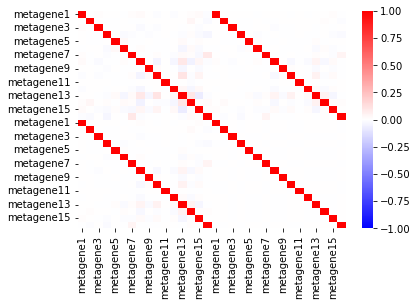

In [7]:
    # Repeat ICA (parallelization)
    num_of_rep = 100
    #Number of independent components
    k =80#100
    W,S = ICAClss.robust_ica(NormalizedLiverDF,k, num_of_rep)

   ## Calculate metasample, sort independent components by explanatory ratio


In [13]:
    metagenes, metasamples, ICAexplain = ICAClss.ICAsort(NormalizedLiverDF, W, S)
    #metagenes.to_excel(save_dir+'MolScore.xlsx')
    #metasamples.to_excel(save_dir+'SampleScore.xlsx')     

35.92% data explained by 80 metagenes


 ## Display the explanation rate up to the calculated IC

In [211]:
    print("{:.2%}".format(sum(ICAexplain)) + " data explained by " + str(k) + " metagenes")
    fig = plt.figure(figsize=(10,8))
    PCAHel.plotPCACovRatio(ICAexplain)
    plt.xticks(size='10',rotation=270);plt.yticks(size='40')

35.92% data explained by 80 metagenes


  ## Module detection and enrichment analysis using each independent component


In [209]:
    qvalcutoff=0.1
    modules = AnalClss.metagenes_topBH(metagenes, qvalcutoff, BloodDict,WTOBDF_mean, OptionDict)

error_1KEGG_2019_Mouse
error_1TRANSFAC_and_JASPAR_PWMs
error_1MSigDB_Computational
error_1Disease_Perturbations_from_GEO_down
error_1Disease_Perturbations_from_GEO_up
error_1GO_Biological_Process_2021
                            Term   P-value  Odds Ratio  Combined Score  \
Index                                                                    
1       Phenylalanine metabolism  0.006881  181.563636      904.004600   
2            Tyrosine metabolism  0.011942  102.333333      453.104671   
3          Tryptophan metabolism  0.014316   84.880851      360.438930   
4              Cocaine addiction  0.014316   84.880851      360.438930   
5         Fanconi anemia pathway  0.015205   79.776000      333.955136   
6          Amphetamine addiction  0.020230   59.483582      232.021751   
7             Insulin resistance  0.032553   36.486239      124.960769   
8           Serotonergic synapse  0.038957   30.325191       98.414323   
9           Dopaminergic synapse  0.039827   29.641791     

                                                    Term   P-value  \
Index                                                                
1      catechol-containing compound biosynthetic proc...  0.001499   
2               serotonin metabolic process (GO:0042428)  0.001499   
3      cell fate commitment involved in formation of ...  0.001499   
4      indolalkylamine biosynthetic process (GO:0046219)  0.001499   
5      indole-containing compound biosynthetic proces...  0.001499   
6         indolalkylamine metabolic process (GO:0006586)  0.001799   
7      phenol-containing compound biosynthetic proces...  0.002697   
8      regulation of glucan biosynthetic process (GO:...  0.002697   
9           endodermal cell fate commitment (GO:0001711)  0.002997   
10               histone H2B ubiquitination (GO:0033523)  0.002997   
11     positive regulation of mRNA 3'-end processing ...  0.002997   
12     positive regulation of transcription elongatio...  0.003296   
13     regulation of

                                               Term   P-value  Odds Ratio  \
Index                                                                       
1                             Arginine biosynthesis  0.000115  156.596078   
2       Alanine, aspartate and glutamate metabolism  0.000445   75.992381   
3          Glycine, serine and threonine metabolism  0.000520   69.982456   
4                Cysteine and methionine metabolism  0.000813   55.375000   
5                         Selenocompound metabolism  0.014358   77.996094   
6                         One carbon pool by folate  0.016034   69.322917   
7           Proximal tubule bicarbonate reclamation  0.018544   59.410714   
8                 Ascorbate and aldarate metabolism  0.022713   47.973558   
9           Glyoxylate and dicarboxylate metabolism  0.026036   41.568750   
10                        Pentose phosphate pathway  0.026865   40.225806   
11                        Citrate cycle (TCA cycle)  0.026865   40.225806   

             Term   P-value  Odds Ratio  Combined Score  \
Index                                                     
1        GNF2 HPN  0.000004   47.355993      586.749374   
2       MODULE 23  0.000083   14.451637      135.882892   
3        GNF2 TST  0.000088   42.182461      393.867302   
4      MODULE 349  0.000092  177.493333     1649.979969   
5      GNF2 GSTM1  0.000101   40.182615      369.585221   
...           ...       ...         ...             ...   
98      MODULE 60  0.306005    2.883107        3.414043   
99      MODULE 52  0.310813    2.828559        3.305353   
100     MODULE 18  0.321516    2.712917        3.078367   
101     MODULE 16  0.356075    2.386397        2.464228   
102     MODULE 45  0.395358    2.083441        1.933355   

                                  Genes  Adjusted P-value  Old P-value  \
Index                                                                    
1           [ALDH1L1, NNMT, ASS1, GNMT]          0.000424            0   
2      [AL

                                                    Term   P-value  \
Index                                                                
1             regulation of gluconeogenesis (GO:0006111)  0.000002   
2        alpha-amino acid metabolic process (GO:1901605)  0.000008   
3       dicarboxylic acid metabolic process (GO:0043648)  0.000015   
4      regulation of carbohydrate biosynthetic proces...  0.000030   
5                                urea cycle (GO:0000050)  0.000030   
...                                                  ...       ...   
157    negative regulation of cellular process (GO:00...  0.386292   
158    negative regulation of transcription by RNA po...  0.446678   
159         regulation of apoptotic process (GO:0042981)  0.474265   
160    negative regulation of transcription, DNA-temp...  0.562142   
161    regulation of transcription by RNA polymerase ...  0.862982   

       Odds Ratio  Combined Score                  Genes  Adjusted P-value  \
Index      

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1       FOXJ1 (human)  0.016689    3.908891       15.999055   
2        UBTF (human)  0.017096    3.883359       15.801023   
3         SP4 (human)  0.043207   24.314634       76.390549   
4      SREBF2 (human)  0.050459    3.228922        9.643480   
5       APEX1 (human)  0.051835    3.198556        9.466748   
...               ...       ...         ...             ...   
176     CBEPB (human)  0.946262    0.334655        0.018485   
177     STAT3 (human)  0.955795    0.312201        0.014115   
178       JUN (human)  0.966124    0.285782        0.009849   
179     GATA2 (human)  0.996340    0.313095        0.001148   
180     FOXC1 (human)  0.999892    0.208374        0.000023   

                                             Genes  Adjusted P-value  \
Index                                                                  
1              [HADHB, FABP2, NCEH1,

                                                    Term       P-value  \
Index                                                                    
1                 fatty acid beta-oxidation (GO:0006635)  5.962220e-14   
2              fatty acid catabolic process (GO:0009062)  5.284038e-13   
3                      fatty acid oxidation (GO:0019395)  3.686242e-09   
4      fatty acid beta-oxidation using acyl-CoA oxida...  4.502209e-07   
5         cardiolipin acyl-chain remodeling (GO:0035965)  2.198015e-05   
...                                                  ...           ...   
136    negative regulation of cellular macromolecule ...  4.415805e-01   
137    negative regulation of transcription by RNA po...  5.186397e-01   
138    negative regulation of transcription, DNA-temp...  6.395077e-01   
139    regulation of transcription by RNA polymerase ...  6.905260e-01   
140    regulation of transcription, DNA-templated (GO...  6.999703e-01   

       Odds Ratio  Combined Score  \


                                                    Term       P-value  \
Index                                                                    
1      Obstructive sleep apnea C0520679 mouse GSE1873...  1.719552e-13   
2      Alcoholic Hepatitis DOID-12351 human GSE28619 ...  3.663454e-10   
3      RA (rheumatoid arthritis) C0003873 human GSE19...  2.750726e-08   
4       Wilson disease DOID-893 mouse GSE5348 sample 966  9.000463e-07   
5      Idiopathic fibrosing alveolitis C0085786 human...  6.267402e-06   
...                                                  ...           ...   
644    multiple sclerosis DOID-2377 human GSE16461 sa...  8.839613e-01   
645    Crohn's disease DOID-8778 human GSE1710 sample...  8.888886e-01   
646    amyotrophic lateral sclerosis DOID-332 mouse G...  8.894231e-01   
647    autism spectrum disorder DOID-0060041 human GS...  8.946305e-01   
648    Nicotine addiction C0028043 human GSE11208 sam...  9.066113e-01   

       Odds Ratio  Combined Score  \


                                                    Term   P-value  \
Index                                                                
1            Protein processing in endoplasmic reticulum  0.000009   
2                                            Spliceosome  0.000081   
3                    Antigen processing and presentation  0.000520   
4                             Estrogen signaling pathway  0.001645   
5                                            Influenza A  0.003128   
6                                          Legionellosis  0.004625   
7                                            Endocytosis  0.011464   
8                           Longevity regulating pathway  0.013735   
9                                          Toxoplasmosis  0.015307   
10                                               Measles  0.026229   
11                               Hippo signaling pathway  0.031483   
12                                           Necroptosis  0.037896   
13                  

                 Term   P-value  Odds Ratio  Combined Score  \
Index                                                         
1         JUN (mouse)  0.002087    3.743173       23.103252   
2        TCF4 (human)  0.008362    2.505402       11.985887   
3       PITX2 (human)  0.013523    2.440867       10.504006   
4      ZNF281 (human)  0.027405    3.225280       11.601396   
5       HINFP (human)  0.032014    2.229569        7.673247   
...               ...       ...         ...             ...   
205    ARID3A (mouse)  0.969292    0.280951        0.008763   
206     FOXC1 (human)  0.972748    0.551921        0.015250   
207       JUN (human)  0.974764    0.346253        0.008850   
208     CBEPB (mouse)  0.985033    0.309085        0.004661   
209     FOXL1 (human)  0.986580    0.412029        0.005567   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [CNOT4, HSP90AB1,

                                                    Term       P-value  \
Index                                                                    
1              response to unfolded protein (GO:0006986)  2.161756e-12   
2      negative regulation of transcription from RNA ...  1.637276e-09   
3      regulation of cellular response to heat (GO:19...  4.637510e-09   
4      regulation of cellular response to stress (GO:...  5.237049e-08   
5      chaperone cofactor-dependent protein refolding...  1.142755e-07   
...                                                  ...           ...   
420    transmembrane receptor protein tyrosine kinase...  5.107350e-01   
421            regulation of cell migration (GO:0030334)  5.142214e-01   
422    regulation of transcription, DNA-templated (GO...  5.633123e-01   
423    positive regulation of nucleic acid-templated ...  5.961256e-01   
424    positive regulation of cellular process (GO:00...  6.711530e-01   

       Odds Ratio  Combined Score  \


              Term       P-value  Odds Ratio  Combined Score  \
Index                                                          
1       MORF HDAC1  2.669956e-09   13.921168      274.820611   
2      MORF PAPSS1  2.168683e-06   18.151030      236.714668   
3         GNF2 DEK  2.541724e-06   26.781671      345.019376   
4      MORF EIF3S6  6.199249e-06   14.979206      179.616895   
5         GNF2 TDG  8.743335e-06   36.154475      421.099087   
...            ...           ...         ...             ...   
252      MODULE 69  8.681124e-01    0.493561        0.069806   
253      MODULE 11  8.721234e-01    0.486035        0.066501   
254     MODULE 100  8.740835e-01    0.482355        0.064915   
255     MODULE 137  8.750524e-01    0.480536        0.064138   
256      MODULE 66  8.779153e-01    0.475156        0.061868   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [EID

                                                    Term   P-value  \
Index                                                                
1             dendritic spine morphogenesis (GO:0060997)  0.001609   
2         mitotic sister chromatid cohesion (GO:0007064)  0.001609   
3      N-terminal protein amino acid acetylation (GO:...  0.001609   
4      mitochondrial electron transport, cytochrome c...  0.001819   
5          aerobic electron transport chain (GO:0019646)  0.002315   
...                                                  ...       ...   
567    positive regulation of intracellular signal tr...  0.875052   
568    negative regulation of cellular process (GO:00...  0.884346   
569     cytokine-mediated signaling pathway (GO:0019221)  0.906530   
570           regulation of gene expression (GO:0010468)  0.984506   
571    regulation of transcription, DNA-templated (GO...  0.992788   

       Odds Ratio  Combined Score                    Genes  Adjusted P-value  \
Index    

                   Term   P-value  Odds Ratio  Combined Score  \
Index                                                           
1         PRDM1 (human)  0.002473    2.506973       15.047195   
2           SRF (human)  0.004421    1.946376       10.552044   
3          NFYA (human)  0.009727    1.935854        8.968542   
4        ZBTB16 (human)  0.011350    2.141557        9.591015   
5         CREB1 (human)  0.021080    1.773337        6.844113   
...                 ...       ...         ...             ...   
236    MZF1 1-4 (human)  0.998967    0.292918        0.000303   
237       FOXC1 (human)  0.999000    0.531796        0.000532   
238       TEAD2 (mouse)  0.999477    0.128015        0.000067   
239        JUND (mouse)  0.999777    0.114363        0.000025   
240         SRF (mouse)  0.999796    0.113095        0.000023   

                                                   Genes  Adjusted P-value  \
Index                                                                       

                                                    Term       P-value  \
Index                                                                    
1      IRE1-mediated unfolded protein response (GO:00...  1.191287e-21   
2      protein exit from endoplasmic reticulum (GO:00...  6.879512e-16   
3      response to endoplasmic reticulum stress (GO:0...  2.725159e-15   
4      endoplasmic reticulum to Golgi vesicle-mediate...  5.195378e-15   
5                         protein transport (GO:0015031)  1.131602e-10   
...                                                  ...           ...   
567    positive regulation of transcription by RNA po...  9.855598e-01   
568           regulation of gene expression (GO:0010468)  9.936429e-01   
569    positive regulation of transcription, DNA-temp...  9.961538e-01   
570    regulation of transcription by RNA polymerase ...  9.982174e-01   
571    regulation of transcription, DNA-templated (GO...  9.999775e-01   

       Odds Ratio  Combined Score  \


              Term   P-value  Odds Ratio  Combined Score  \
Index                                                      
1        GNF2 NPM1  0.000137   34.613913      307.814900   
2        GNF2 MBD4  0.000556   66.719064      500.063177   
3      MORF EIF3S6  0.000634   20.190508      148.684869   
4      GNF2 EIF3S6  0.000634   20.190508      148.684869   
5      MORF EIF4A2  0.000909   17.765373      124.420753   
...            ...       ...         ...             ...   
158      MODULE 84  0.541538    1.312787        0.805187   
159      MODULE 66  0.543515    1.305438        0.795922   
160      MODULE 23  0.551988    1.274494        0.757341   
161      MODULE 55  0.696831    0.850963        0.307379   
162      MODULE 88  0.698598    0.846719        0.303700   

                       Genes  Adjusted P-value  Old P-value  \
Index                                                         
1       [SSB, SERBP1, EIF3E]          0.022254            0   
2              [JUND, RPL22]  

                                          Term   P-value  Odds Ratio  \
Index                                                                  
1                    Pentose phosphate pathway  0.000058   46.843260   
2                      HIF-1 signaling pathway  0.000104   18.467907   
3                 Glycolysis / Gluconeogenesis  0.000524   21.188565   
4              Fructose and mannose metabolism  0.003061   26.828283   
5                                    Autophagy  0.003531   10.643880   
...                                        ...       ...         ...   
64                       Ras signaling pathway  0.423858    1.847920   
65                                 Endocytosis  0.471217    1.596772   
66                      MAPK signaling pathway  0.501840    1.458673   
67     Neuroactive ligand-receptor interaction  0.562183    1.228292   
68                  PI3K-Akt signaling pathway  0.571519    1.196690   

       Combined Score                           Genes  Adjusted

                                                    Term   P-value  \
Index                                                                
1               Hypoxia C0242184 mouse GSE3195 sample 70  0.000003   
2      Vitamin A Deficiency C0042842 rat GSE1600 samp...  0.000383   
3      Familial hypophosphataemic rickets C0733682 mo...  0.000461   
4      Leukemia, Acute Megakaryocytic C0023462 mouse ...  0.000508   
5      acute myocardial infarction DOID-9408 mouse GS...  0.000510   
...                                                  ...       ...   
547    Down syndrome DOID-14250 mouse GSE39159 sample...  0.707692   
548    autistic disorder DOID-12849 human GSE6575 sam...  0.708397   
549    Purpura, Idiopathic Thrombocytopenic C0043117 ...  0.718096   
550    West Nile fever DOID-2366 human GSE30719 sampl...  0.718776   
551    acute myocarditis DOID-3951 mouse GSE35182 sam...  0.744718   

       Odds Ratio  Combined Score  \
Index                               
1       13.0015

                  Term   P-value  Odds Ratio  Combined Score  \
Index                                                          
1         ETV4 (human)  0.000259    2.462933       20.337777   
2         MZF1 (human)  0.006937    1.986974        9.877160   
3        RUNX1 (human)  0.013321    1.555905        6.719072   
4      MIR133B (human)  0.014931    1.827013        7.681281   
5         LEF1 (mouse)  0.016508    1.755426        7.204152   
...                ...       ...         ...             ...   
251      FOXL1 (human)  0.999436    0.525366        0.000297   
252       NRF1 (human)  0.999647    0.187147        0.000066   
253       NFYB (mouse)  0.999850    0.214686        0.000032   
254      CPEB1 (mouse)  0.999850    0.214686        0.000032   
255      FOXC1 (human)  0.999995    0.383820        0.000002   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [C1Q

                                                    Term       P-value  \
Index                                                                    
1      neutrophil activation involved in immune respo...  1.339103e-12   
2                  neutrophil degranulation (GO:0043312)  8.775039e-12   
3              neutrophil mediated immunity (GO:0002446)  1.163278e-11   
4                regulation of phagocytosis (GO:0050764)  1.042088e-08   
5      positive regulation of cytokine production (GO...  2.954075e-08   
...                                                  ...           ...   
1363                 organelle organization (GO:0006996)  9.572669e-01   
1364   negative regulation of nucleic acid-templated ...  9.694068e-01   
1365   negative regulation of transcription, DNA-temp...  9.937979e-01   
1366   regulation of transcription by RNA polymerase ...  9.993442e-01   
1367   regulation of transcription, DNA-templated (GO...  9.998636e-01   

       Odds Ratio  Combined Score  \


              Term   P-value  Odds Ratio  Combined Score                Genes  \
Index                                                                           
1       MODULE 130  0.000262  100.040100      824.992061           [C4B, C4A]   
2         GNF2 HPX  0.000366   25.059343      198.296004    [APOH, PON1, ALB]   
3         GNF2 HPN  0.008485   15.948574       76.065917         [APOH, PON1]   
4        MODULE 24  0.011336    7.232963       32.402022  [APOH, ALB, CYB561]   
5       MODULE 415  0.013568   83.195833      357.743930                [ALB]   
...            ...       ...         ...             ...                  ...   
73     MORF MAGEA9  0.365239    2.289461        2.305951             [TRIM24]   
74       MODULE 64  0.423826    1.882205        1.615745               [APOH]   
75      MODULE 100  0.439768    1.789687        1.470241                [ALB]   
76      MODULE 137  0.440977    1.782936        1.459801                [ALB]   
77       MODULE 66  0.444588

                                                    Term   P-value  \
Index                                                                
1                                  TNF signaling pathway  0.000856   
2                                     Pathways in cancer  0.001969   
3                                 Acute myeloid leukemia  0.006128   
4                                          Melanogenesis  0.012512   
5      AGE-RAGE signaling pathway in diabetic complic...  0.012752   
...                                                  ...       ...   
57                                cAMP signaling pathway  0.302954   
58                                 Ras signaling pathway  0.328845   
59                                   MicroRNAs in cancer  0.382136   
60                                MAPK signaling pathway  0.395847   
61               Neuroactive ligand-receptor interaction  0.449707   

       Odds Ratio  Combined Score                           Genes  \
Index               

                                                    Term   P-value  \
Index                                                                
1      idiopathic urticaria DOID-1555 human GSE57178 ...  0.000589   
2      PTSD - Post-traumatic stress disorder C0038436...  0.001236   
3      Waldenstrom Macroglobulinemia UMLS CUI-C002441...  0.001480   
4      glaucoma associated with systemic syndromes DO...  0.002335   
5      Diamond-Blackfan anaemia DOID-1339 human GSE14...  0.003863   
...                                                  ...       ...   
345    pancreatic ductal adenocarcinoma DOID-3498 hum...  0.567791   
346    juvenile dermatomyositis UMLS CUI-C0263666 hum...  0.569296   
347    juvenile dermatomyositis UMLS CUI-C0263666 hum...  0.579689   
348    autistic disorder DOID-12849 human GSE6575 sam...  0.589838   
349    West Nile fever DOID-2366 human GSE30719 sampl...  0.600448   

       Odds Ratio  Combined Score                             Genes  \
Index             

             Term       P-value  Odds Ratio  Combined Score  \
Index                                                         
1      MODULE 345  1.192397e-09   22.695951      466.340518   
2       MODULE 45  2.989321e-08    7.807312      135.266639   
3       MODULE 44  3.639861e-08   10.665496      182.686466   
4      MODULE 436  5.356955e-08   17.904116      299.755809   
5       MODULE 46  2.130156e-06    7.808192      101.969638   
...           ...           ...         ...             ...   
128    MODULE 179  8.350762e-01    0.555740        0.100162   
129     MODULE 37  8.369694e-01    0.552152        0.098265   
130    MODULE 136  8.490542e-01    0.529343        0.086618   
131     MODULE 69  8.681124e-01    0.493561        0.069806   
132     MODULE 41  8.843459e-01    0.463047        0.056912   

                                                   Genes  Adjusted P-value  \
Index                                                                        
1      [CXCL9, RSAD2, ST

                                                    Term       P-value  \
Index                                                                    
1      cellular response to type I interferon (GO:007...  1.057020e-17   
2       type I interferon signaling pathway (GO:0060337)  1.057020e-17   
3              defense response to symbiont (GO:0140546)  1.160446e-12   
4                 defense response to virus (GO:0051607)  2.521352e-12   
5       cytokine-mediated signaling pathway (GO:0019221)  8.265411e-09   
...                                                  ...           ...   
514    positive regulation of transcription by RNA po...  8.604653e-01   
515    positive regulation of cellular process (GO:00...  9.079684e-01   
516    regulation of transcription by RNA polymerase ...  9.272227e-01   
517    regulation of transcription, DNA-templated (GO...  9.337306e-01   
518    positive regulation of transcription, DNA-temp...  9.412935e-01   

       Odds Ratio  Combined Score  \


                                                    Term       P-value  \
Index                                                                    
1      Obstructive sleep apnea C0520679 mouse GSE1873...  5.767503e-12   
2      Alcoholic Hepatitis DOID-12351 human GSE28619 ...  8.960525e-11   
3      idiopathic pulmonary fibrosis DOID-0050156 hum...  1.523568e-08   
4      HIV - Human immunodeficiency virus infection C...  9.159545e-08   
5      idiopathic pulmonary fibrosis DOID-0050156 hum...  1.102970e-07   
...                                                  ...           ...   
634           Epilepsy C0014544 human GSE7486 sample 417  7.583423e-01   
635    Dental cavity, complex C0399396 human GSE1629 ...  7.583423e-01   
636    polycystic ovary syndrome DOID-11612 human GSE...  7.693286e-01   
637         Hypertension C0020538 rat GSE2739 sample 209  7.726089e-01   
638    facioscapulohumeral muscular dystrophy DOID-11...  7.883329e-01   

       Odds Ratio  Combined Score  \


                                          Term   P-value  Odds Ratio  \
Index                                                                  
1                                     Ribosome  0.000003    7.185307   
2                                   Proteasome  0.000058   13.704268   
3                           Huntington disease  0.000065    5.614563   
4                    Oxidative phosphorylation  0.000221    6.237850   
5                       Cholesterol metabolism  0.001001    9.930446   
...                                        ...       ...         ...   
141                      Ras signaling pathway  0.881243    0.469037   
142    Human T-cell leukemia virus 1 infection  0.893658    0.445697   
143     Cytokine-cytokine receptor interaction  0.931038    0.372814   
144    Neuroactive ligand-receptor interaction  0.958893    0.311752   
145           Herpes simplex virus 1 infection  0.981309    0.249318   

       Combined Score                                          

                                                    Term       P-value  \
Index                                                                    
1      nemaline myopathy DOID-3191 mouse GSE3384 samp...  1.721576e-20   
2      acute myocardial infarction DOID-9408 mouse GS...  3.693646e-14   
3      Hepatic lipidosis C0015695 mouse GSE5538 sampl...  1.289734e-13   
4      Hepatitis, Autoimmune C0241910 mouse GSE867 sa...  4.437116e-13   
5      nemaline myopathy DOID-3191 mouse GSE3384 samp...  4.526371e-13   
...                                                  ...           ...   
781           asthma DOID-2841 human GSE27011 sample 565  9.726527e-01   
782    precursor B lymphoblastic lymphoma/leukemia DO...  9.781121e-01   
783    Psoriasis vulgaris C0263361 human GSE13355 sam...  9.785147e-01   
784    CML - Chronic myeloid leukemia C0023473 human ...  9.826483e-01   
785    pulmonary tuberculosis DOID-2957 mouse GSE4802...  9.885851e-01   

       Odds Ratio  Combined Score  \


 ## ANOVA & multiple comparison test


/Users/fujita/Dropbox/Python/Jupyter/ICA/AnalHelper.py:89: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.mean())
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Scheffe_qvalues_Time


,0,2,4,6,8,12,16,24
metasample1_0,1.000000,1.000000,0.102023,0.010268,0.000447,0.006139,0.004156,0.3018
metasample1_2,1.000000,1.000000,0.820082,0.165588,0.014115,0.118335,0.092774,1.0000
metasample1_4,0.102023,0.820082,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample1_6,0.010268,0.165588,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample1_8,0.000447,0.014115,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
...,...,...,...,...,...,...,...,...
metasample14_6,0.878862,0.132769,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample14_8,1.000000,0.278226,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample14_12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
metasample14_16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


Scheffe_qvalues_WTOB


,WT,OB
metasample1_WT,1.000000e+00,2.232189e-08
metasample1_OB,2.232189e-08,1.000000e+00
metasample2_WT,1.000000e+00,9.719357e-01
metasample2_OB,9.719357e-01,1.000000e+00
metasample5_WT,1.000000e+00,6.164005e-02
metasample5_OB,6.164005e-02,1.000000e+00
metasample7_WT,1.000000e+00,2.298065e-01
metasample7_OB,2.298065e-01,1.000000e+00
metasample14_WT,1.000000e+00,9.994870e-02
metasample14_OB,9.994870e-02,1.000000e+00


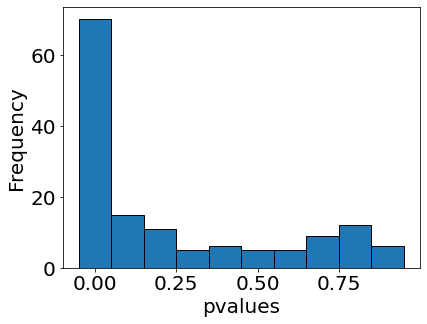

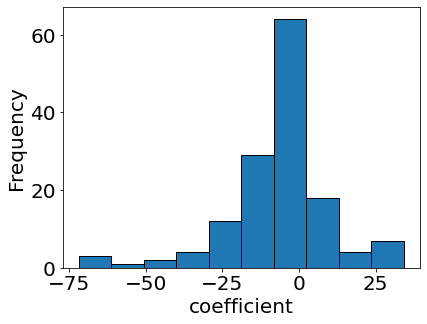

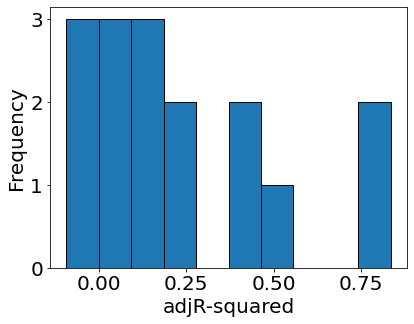

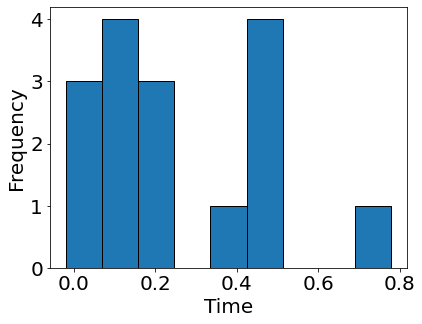

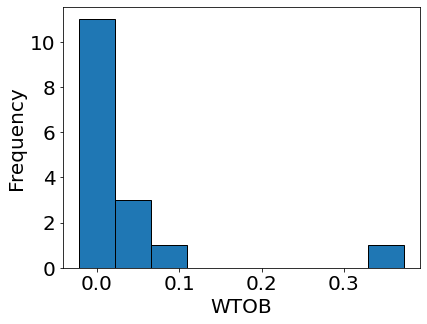

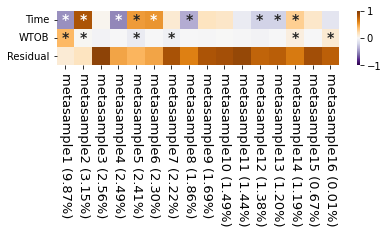

In [210]:
    pvals = AnalClss.ANOVA_Time_Indiv_Fasting(metasamples,ICAexplain)

 ## Display of sample independent component

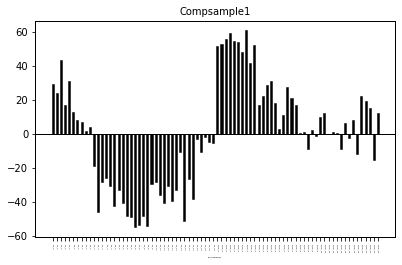

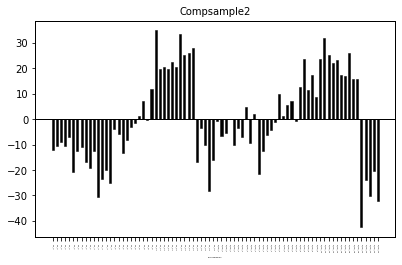

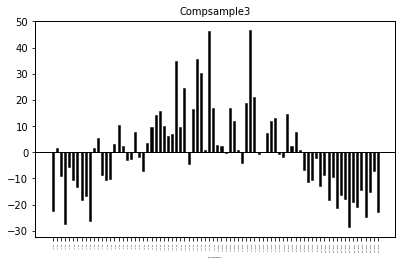

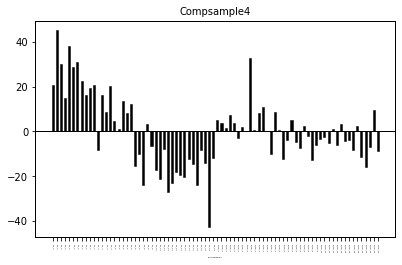

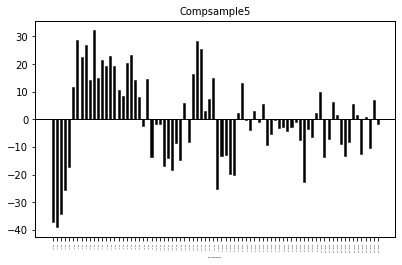

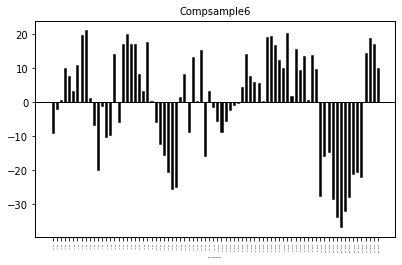

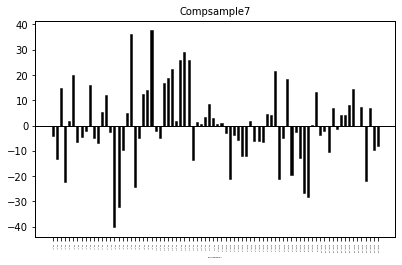

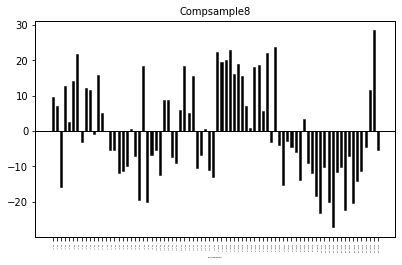

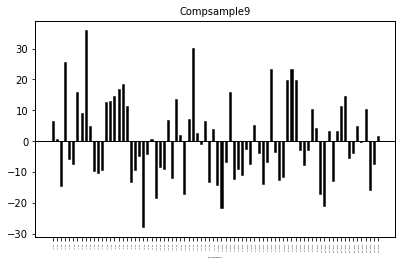

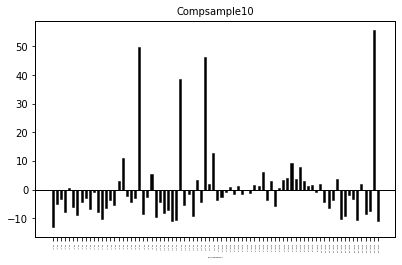

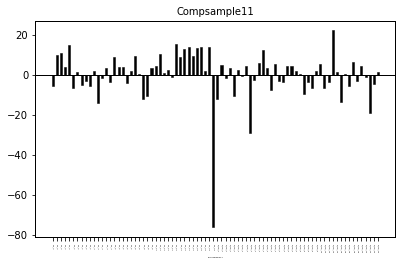

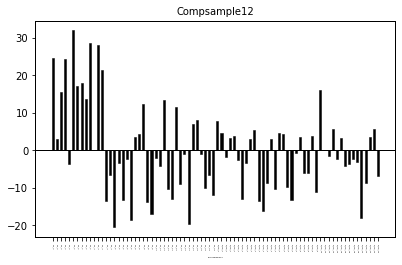

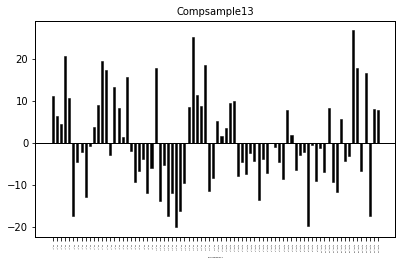

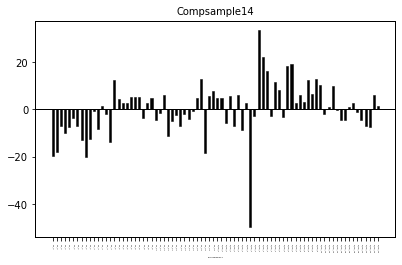

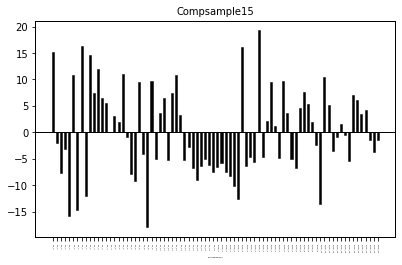

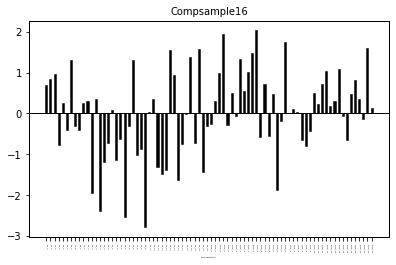

In [206]:
    AnalClss.Analeachcomponents(metasamples,metasamples) 

# Metabolome
## Define functions for preprocessing
- **changeshapeDF_Fastingmice()**：zscore in the sample direction, and creation of mean standard error data for each WT/OB time point

In [8]:
def changeshapeDF_Fastingmice(DF):
    def mkZscore(DF,IndLabel,ColLabel,axis):
        if axis=='col':##zscore in column direction
            ax=0
        else:##zscore in row direction
            ax=1
        meanNP = np.array(DF) -np.nanmean(np.array(DF),axis=ax,keepdims=True)
        stdNP = np.nanstd(np.array(DF),axis=ax)
        ZscoredDF = pd.DataFrame(index=IndLabel,columns=ColLabel)
        if axis=='col':
            for i in range(len(ColLabel)): 
                ZscoredNP = meanNP[:,i]/stdNP[i]
                ZscoredDF[ColLabel[i]] = ZscoredNP  
        else:    
            for i in range(len(IndLabel)): 
                ZscoredNP = meanNP[i,:]/stdNP[i]
                ZscoredDF.loc[IndLabel[i]] = ZscoredNP
        return(ZscoredDF) 
    timepoint=[0,2,4,6,8,12,16,24]
    condition=['WT','OB']
    #DF = DF[DF.max(axis=1)>5] ##old Threshold
    NewDF = pd.DataFrame(np.array(mkZscore(DF,list(DF.index),list(DF.columns),'row').fillna(0)) )  
    NewDF.index=list(DF.index); NewDF.columns=list(DF.columns)

    ##Organize by label
    Dict=dict() 
    for i in range(len(timepoint)*len(condition)):
        Dict[i] = DF.iloc[:,0+(5*i):5+(5*i)]
        if i==0:
            WT_MeanStack = pd.DataFrame(Dict[i].mean(axis=1))
            WT_SemStack = pd.DataFrame(Dict[i].sem(axis=1))
        elif i<len(timepoint):
            WT_MeanStack = pd.concat( [WT_MeanStack,pd.DataFrame(Dict[i].mean(axis=1))],axis=1)
            WT_SemStack = pd.concat( [WT_SemStack,pd.DataFrame(Dict[i].sem(axis=1))],axis=1)
        elif i == len(timepoint):
            OB_MeanStack = pd.DataFrame(Dict[i].mean(axis=1))
            OB_SemStack = pd.DataFrame(Dict[i].sem(axis=1))
        else:
            OB_MeanStack = pd.concat( [OB_MeanStack,pd.DataFrame(Dict[i].mean(axis=1))],axis=1)
            OB_SemStack = pd.concat( [OB_SemStack,pd.DataFrame(Dict[i].sem(axis=1))],axis=1)

    WTOBHstack_mean = np.hstack([WT_MeanStack,OB_MeanStack])  
    WTOBHstack_sem = np.hstack([WT_SemStack,OB_SemStack])  


    return(NewDF,DF,WTOBHstack_mean,WTOBHstack_sem)

## Load data

In [9]:
    ICAMetabClss = ICAHel.ICA_class()
    AnalMetabClss = AnalHel.Anal_class()
    AnalMetabClss.data='Metabolome'
    
    
    LiverMetabDF = pd.read_csv(file_dir+'/data_raw_liver.csv',header=0,index_col=0)
    NameMetabDF  = pd.read_csv(file_dir+'/sample_info_liver.csv',header=0,index_col=0)

## Data  preprocessing

In [10]:
    KEGGID = list(LiverMetabDF.index)
    MolNameDict = {key: val for key, val in zip(list(LiverMetabDF['Name']),KEGGID )}
    LiverMetabDF.index = list(LiverMetabDF['Name'])

    LiverMetabDF=LiverMetabDF.drop('Name',axis=1)
    LiverMetabDF.columns=[str(i) +'_' +str(j) for i, j in zip(NameMetabDF['MouseType'],NameMetabDF['FastingTime(h)'])]
  
    NormalizedLiverMetabDF,RawMetabDF,WTOBHMetabstack_mean,WTOBHMetabstack_sem= changeshapeDF_Fastingmice(LiverMetabDF)
    display(NormalizedLiverMetabDF)
    WTOBHMetabstack_mean=pd.DataFrame(WTOBHMetabstack_mean);WTOBHMetabstack_mean.index=list(NormalizedLiverMetabDF.index)
    WTOBHMetabstack_sem=pd.DataFrame(WTOBHMetabstack_sem);WTOBHMetabstack_sem.index=list(NormalizedLiverMetabDF.index)
    OptionMetabDict={};OptionMetabDict['std']=WTOBHMetabstack_sem

/var/folders/7t/dzktz3396j1bt0g1wr1dc7k00000gn/T/ipykernel_26127/1287239802.py:7: RuntimeWarning: Mean of empty slice
  meanNP = np.array(DF) -np.nanmean(np.array(DF),axis=ax,keepdims=True)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/7t/dzktz3396j1bt0g1wr1dc7k00000gn/T/ipykernel_26127/1287239802.py:16: RuntimeWarning: invalid value encountered in true_divide
  ZscoredNP = meanNP[i,:]/stdNP[i]


,WT_0,WT_0,WT_0,WT_0,WT_0,WT_2,WT_2,WT_2,WT_2,WT_2,...,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_16,ob/ob_24,ob/ob_24,ob/ob_24,ob/ob_24,ob/ob_24
Urea,1.031139,0.821832,0.662109,-0.026057,0.407134,-0.679479,-0.834394,-0.479995,-0.646331,0.268695,...,-0.684194,-0.836639,-0.750901,-0.486695,-1.085574,0.715302,-0.457835,-1.141954,0.274301,0.695001
Pyrazole,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3-Aminopropionitrile,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Methylguanidine,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Isobutylamine,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NADH,1.982748,0.844059,-0.403419,0.408106,0.563161,0.418755,0.577862,1.534691,0.137917,-0.210241,...,-0.834157,-1.338853,-0.756289,-0.535971,-1.447877,-0.099113,-0.803131,-1.254763,-0.895452,-0.446394
NADP+,2.039469,0.547696,0.327501,-0.266220,-0.580484,-0.252083,-0.396313,-1.047790,-0.660701,-0.067905,...,-0.879483,-0.433810,-0.434106,-0.688065,-0.214628,0.668256,0.638710,-0.060214,-0.829987,-0.144540
FAD,2.251256,0.736487,-0.195404,0.260493,-0.130095,0.401191,0.281205,-0.409101,-0.770304,0.454009,...,-1.465754,-0.805150,-1.279392,-0.740622,-1.088528,1.363896,0.237670,-0.956589,-1.362070,-0.353832
Glycogen,1.637221,1.731011,0.964799,0.027446,1.054153,-0.681290,-0.080520,-0.885775,-0.984620,-0.362914,...,0.575274,0.100720,0.078518,0.068895,0.223170,0.659637,0.045014,0.162018,1.745173,0.264867


## Perform ICA

80 100
Getting 80 ICs * 100 times in parallel.


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarni

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

Calculating distances b/w ICs.
DBSCAN identified 53 clusters of ICs.
Orthogonality of ICs is 100.0 %


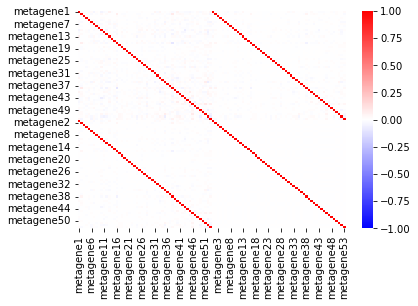

In [11]:
    # Repeat ICA (parallelization)
    num_of_rep = 100
    #Number of independent components
    k =80#100
    W,S = ICAMetabClss.robust_ica(NormalizedLiverMetabDF,k, num_of_rep)

   ## Calculate metasample, sort independent components by explanatory ratio


In [12]:
    metagenes, metasamples, ICAexplain = ICAClss.ICAsort(NormalizedLiverMetabDF, W, S)
    #metagenes.to_excel(save_dir+'MolScore.xlsx')
    #metasamples.to_excel(save_dir+'SampleScore.xlsx') 

 ## Display the explanation rate up to the calculated IC

60.11% data explained by 80 metagenes


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

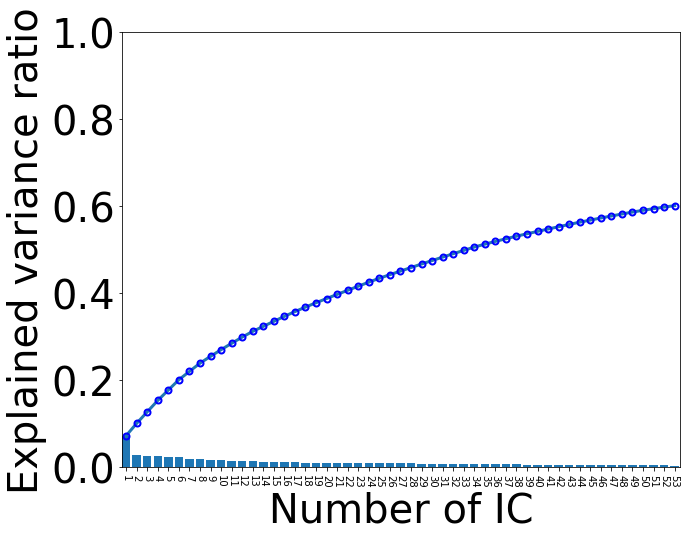

In [13]:
    print("{:.2%}".format(sum(ICAexplain)) + " data explained by " + str(k) + " metagenes")
    fig = plt.figure(figsize=(10,8))
    AnalMetabClss.plotCovRatio(ICAexplain)
    plt.xticks(size='10',rotation=270);plt.yticks(size='40')

 ## ANOVA & multiple comparison test


/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:90: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.mean())
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:90: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.mean())
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:90: RuntimeWarning: Mean of empty slice.
  return np.sign(cat_model[metasample].params[cat_model[metasample].params.index.str.contains(factor)].values.

/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvals = pvals.append(s)


Scheffe_qvalues_Time


,0,2,4,6,8,12,16,24
metasample2_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample2_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample2_4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample2_6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample2_8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
metasample50_6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample50_8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample50_12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
metasample50_16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Scheffe_qvalues_WTOB


,WT,OB
metasample1_WT,1.000000e+00,1.129369e-12
metasample1_OB,1.129369e-12,1.000000e+00
metasample2_WT,1.000000e+00,2.498963e-07
metasample2_OB,2.498963e-07,1.000000e+00
metasample4_WT,1.000000e+00,1.397412e-06
metasample4_OB,1.397412e-06,1.000000e+00
metasample5_WT,1.000000e+00,6.404871e-01
metasample5_OB,6.404871e-01,1.000000e+00
metasample6_WT,1.000000e+00,4.200061e-14
metasample6_OB,4.200061e-14,1.000000e+00


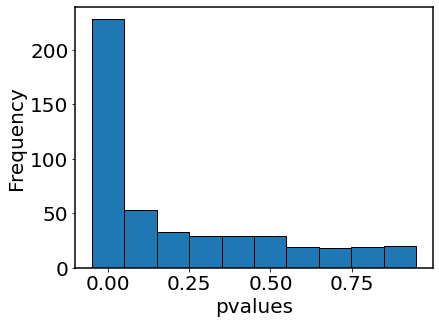

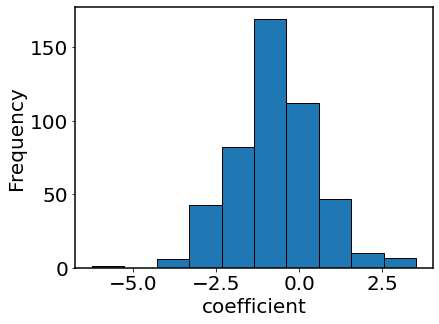

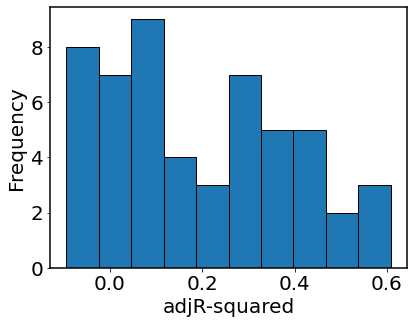

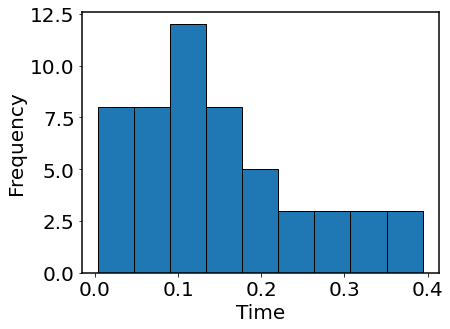

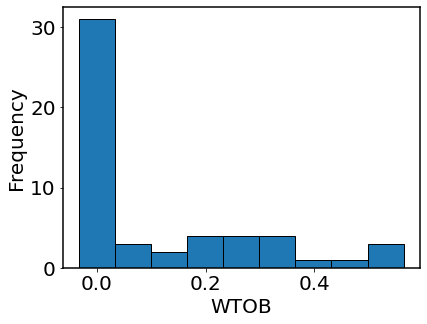

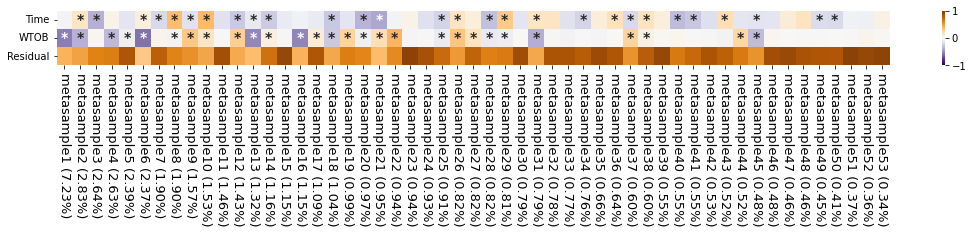

In [14]:
    pvals = AnalMetabClss.ANOVA_Time_Indiv_Fasting(metasamples,ICAexplain)

   ## Module detection and enrichment analysis using each independent component

In [15]:
    qvalcutoff=0.1
    modules = AnalMetabClss.metagenes_topBH(metagenes, qvalcutoff, MolNameDict,WTOBHMetabstack_mean, OptionMetabDict)

In [44]:
    import pyper
    # Use R
    r = pyper.R(use_numpy = 'True', use_pandas='True')   
    r('install.packages("MetaboAnalystR")')
    r('install.packages("installr")')
    r('install.packages("xlsx", dep=T)')

    r("library(MetaboAnalystR)")
    r("library(installr)")
    r("library(xlsx)")
    LiverMetabDF = pd.read_csv(file_dir+'/data_raw_liver.csv',header=0,index_col=0)

    r('DF <- read.csv("../Data/timecourse_fasting/data_raw_liver.csv")' )

    for i in range(1,len(modules)):
        r('Metabvec <- c()')
        ModuleName = 'metagene' + str(i)
        for jj in range(len(modules[ModuleName])):
            r( 'mSet<-InitDataObjects("conc", "msetora", FALSE)')
            r.assign("j", modules[ModuleName][jj])
            r('Metabvec <- append(Metabvec, DF[DF$Name==c(j),]$KEGG.ID)')

        r('cmpd.vec<- Metabvec')
        r('mSet<-Setup.MapData(mSet, cmpd.vec);')
        r('mSet<-CrossReferencing(mSet, "kegg");')
        r('mSet<-CreateMappingResultTable(mSet)')
        r('mSet<-SetMetabolomeFilter(mSet, F);')
        r('mSet<-SetCurrentMsetLib(mSet, "kegg_pathway", 2);')
        r('mSet<-CalculateHyperScore(mSet)')
        r('mSet<-PlotORA(mSet, "ora_0_", "net", "png", 72, width=NA)')
        r('mSet<-PlotEnrichDotPlot(mSet, "ora", "ora_dot_0_", "png", 72, width=NA)')
        r('mSet<-CalculateHyperScore(mSet)')
        r('mSet<-PlotORA(mSet, "ora_1_", "net", "png", 72, width=NA)')
        r('mSet<-PlotEnrichDotPlot(mSet, "ora", "ora_dot_1_", "png", 72, width=NA)')
        r('mSet<-CalculateHyperScore(mSet)')
        r('mSet<-PlotORA(mSet, "ora_2_", "net", "png", 72, width=NA)')
        r('mSet<-PlotEnrichDotPlot(mSet, "ora", "ora_dot_2_", "png", 72, width=NA)')
        r('Result<-mSet$api$ora.results')
        print(ModuleName)
        print(f'query is {modules[ModuleName]}')
        print(r('Result'))

metagene1
query is []
try({Result})
Error in try({ :  オブジェクト 'Result' がありません 

metagene2
query is ['G1P', 'G6P', 'F6P', '2-Hydroxyglutarate', '6-Phosphogluconate', 'S7P', '3-Ureidopropionate', 'Pelargonate', 'Dodecanoate']
try({Result})
                                                total expected hits    Raw p
Starch and sucrose metabolism                      18   0.1060    3 0.000112
Pentose phosphate pathway                          22   0.1300    3 0.000208
Amino sugar and nucleotide sugar metabolism        37   0.2190    3 0.001010
Glycolysis / Gluconeogenesis                       26   0.1540    2 0.009390
Galactose metabolism                               27   0.1600    2 0.010100
Neomycin, kanamycin and gentamicin biosynthesis     2   0.0118    1 0.011800
Butanoate metabolism                               15   0.0887    1 0.085500
Pentose and glucuronate interconversions           18   0.1060    1 0.102000
Pantothenate and CoA biosynthesis                  19   0.1120    1 0.

metagene8
query is ['Ala', 'GABA', 'gamma-Guanidinobutyrate', 'Thiamine', 'Glycerophosphate', '2PG', 'Lactate', '2-Hydroxyglutarate', 'Succinate', 'Glycerate', 'Threonate', 'Urate']
try({Result})
                                            total expected hits    Raw p Holm p
Butanoate metabolism                           15   0.1180    3 0.000162 0.0136
Alanine, aspartate and glutamate metabolism    28   0.2210    3 0.001100 0.0912
Glycerolipid metabolism                        16   0.1260    2 0.006430 0.5280
Arginine and proline metabolism                38   0.3000    2 0.034200 1.0000
Thiamine metabolism                             7   0.0552    1 0.054000 1.0000
Citrate cycle (TCA cycle)                      20   0.1580    1 0.147000 1.0000
Selenocompound metabolism                      20   0.1580    1 0.147000 1.0000
Pentose phosphate pathway                      22   0.1730    1 0.161000 1.0000
Pyruvate metabolism                            22   0.1730    1 0.161000 1.0000
Prop

metagene15
query is ['Spermine', 'Arg', 'N6,N6,N6-Trimethyllysine', '2,3-DPG', 'Threonate']
try({Result})
                                total expected hits   Raw p Holm p   FDR
Arginine and proline metabolism    38   0.1250    2 0.00579  0.486 0.486
Arginine biosynthesis              14   0.0460    1 0.04520  1.000 1.000
beta-Alanine metabolism            21   0.0690    1 0.06720  1.000 1.000
Lysine degradation                 25   0.0821    1 0.07960  1.000 1.000
Glycolysis / Gluconeogenesis       26   0.0854    1 0.08270  1.000 1.000
Glutathione metabolism             28   0.0920    1 0.08880  1.000 1.000
Aminoacyl-tRNA biosynthesis        48   0.1580    1 0.14800  1.000 1.000

metagene16
query is ['Choline', 'Cytosine', 'Hydroxyproline', 'Gln', 'Met', 'Xanthine', '1-Methyladenosine', 'Ru5P', '5-Oxoproline', '3-Phenylpropionate', 'N-Acetylglucosamine 1-phosphate', 'ADP-ribose']
try({Result})
                                            total expected hits   Raw p Holm p
D-Glutamine 

metagene23
query is ['4-Hydroxymethylimidazole', 'Acetyl CoA', 'dTMP', 'Isobutyryl CoA']
try({Result})
                                           total expected hits   Raw p Holm p
Valine, leucine and isoleucine degradation    40  0.07880    2 0.00199  0.167
Synthesis and degradation of ketone bodies     5  0.00986    1 0.00983  0.816
Butanoate metabolism                          15  0.02960    1 0.02930  1.000
Terpenoid backbone biosynthesis               18  0.03550    1 0.03510  1.000
Citrate cycle (TCA cycle)                     20  0.03940    1 0.03890  1.000
beta-Alanine metabolism                       21  0.04140    1 0.04090  1.000
Pyruvate metabolism                           22  0.04340    1 0.04280  1.000
Propanoate metabolism                         23  0.04530    1 0.04470  1.000
Lysine degradation                            25  0.04930    1 0.04850  1.000
Glycolysis / Gluconeogenesis                  26  0.05120    1 0.05040  1.000
Glutathione metabolism                 

metagene45
query is ['S-Methylmethionine', 'S-Lactoylglutathione']
try({Result})
                                            total expected hits   Raw p Holm p
Histidine metabolism                           16   0.0631    2 0.00152  0.127
Arginine biosynthesis                          14   0.0552    1 0.05400  1.000
Nicotinate and nicotinamide metabolism         15   0.0591    1 0.05780  1.000
Pantothenate and CoA biosynthesis              19   0.0749    1 0.07270  1.000
Citrate cycle (TCA cycle)                      20   0.0788    1 0.07640  1.000
beta-Alanine metabolism                        21   0.0828    1 0.08010  1.000
Lysine degradation                             25   0.0986    1 0.09470  1.000
Alanine, aspartate and glutamate metabolism    28   0.1100    1 0.10600  1.000
Glyoxylate and dicarboxylate metabolism        32   0.1260    1 0.12000  1.000
Glycine, serine and threonine metabolism       33   0.1300    1 0.12300  1.000
Arginine and proline metabolism                38 

 # display of sample independent component

/Users/fujita/Dropbox/Python/Jupyter/ICA/notebooks/AnalHelper.py:342: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5,3))


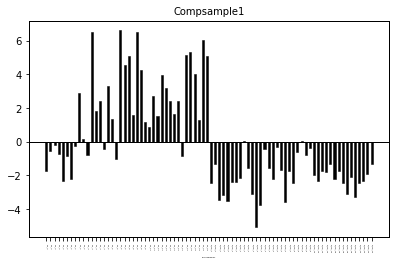

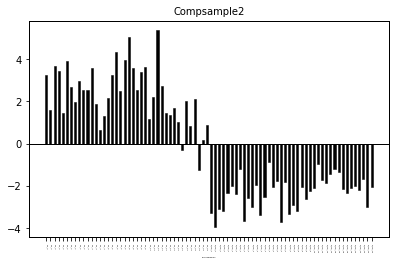

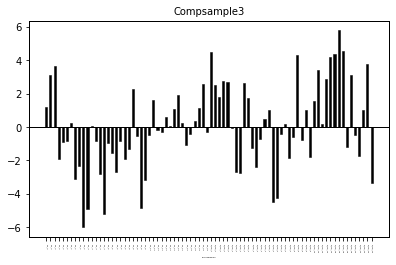

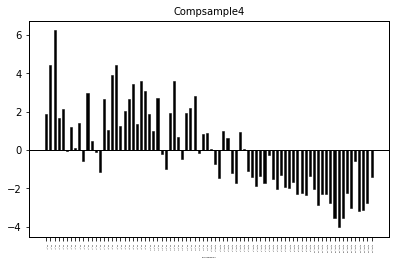

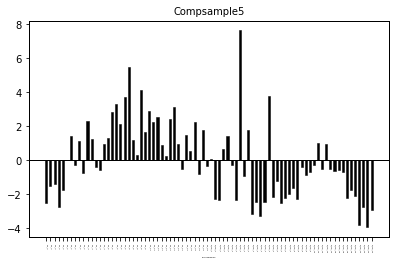

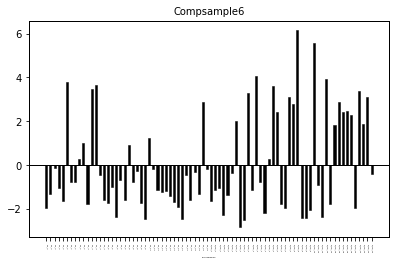

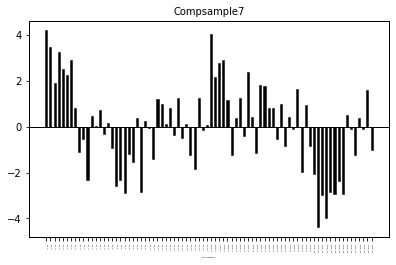

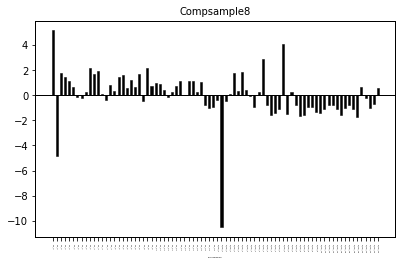

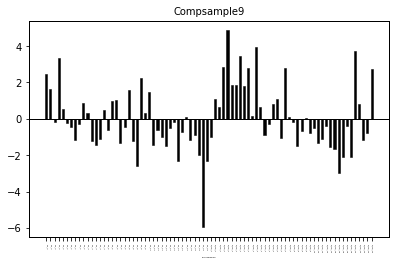

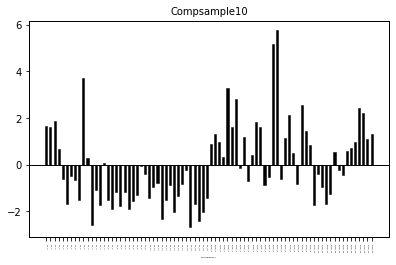

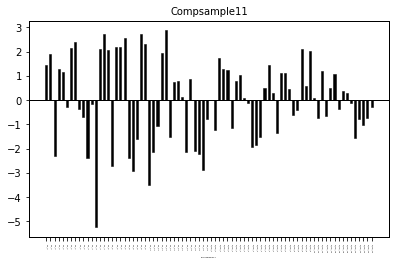

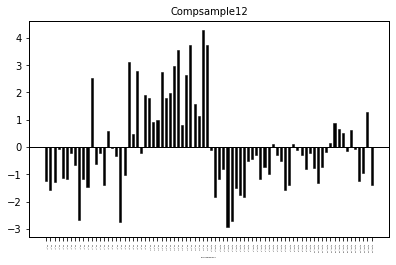

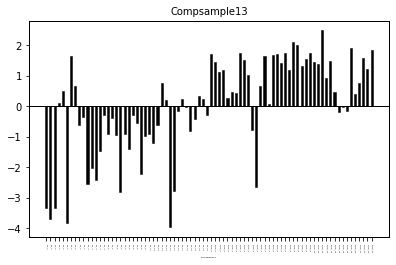

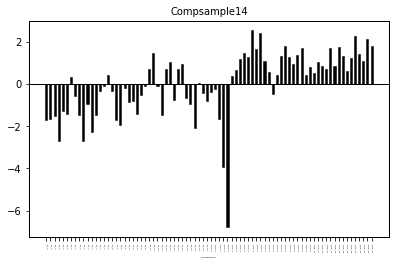

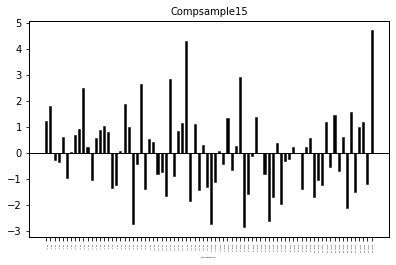

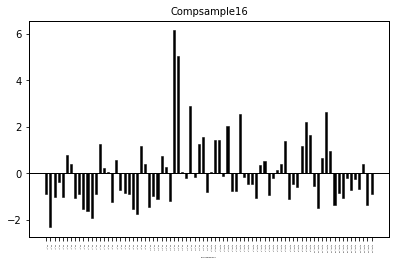

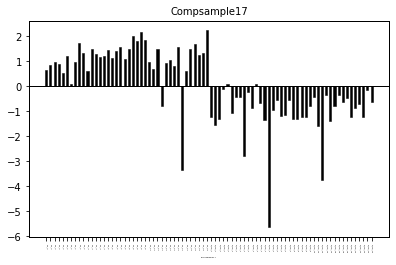

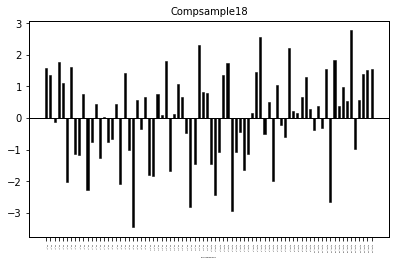

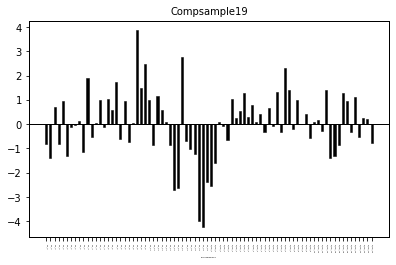

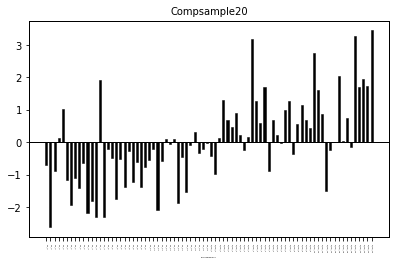

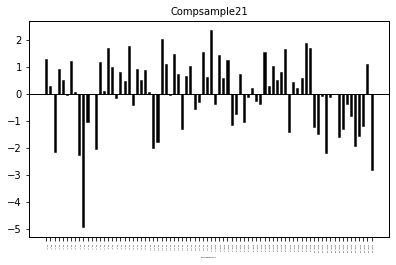

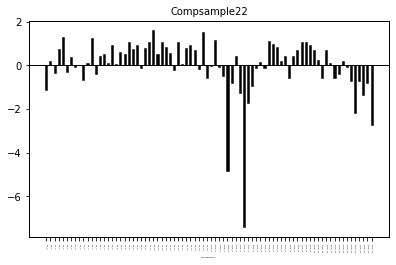

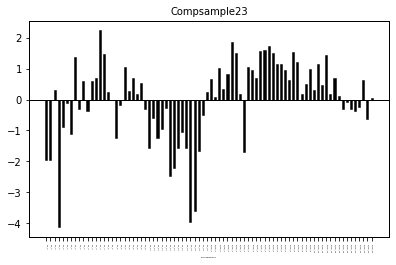

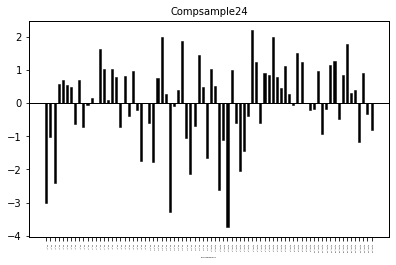

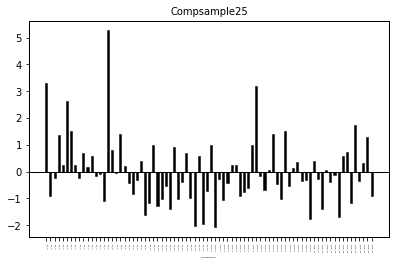

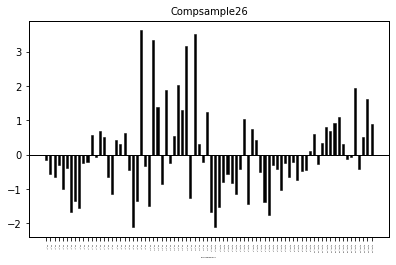

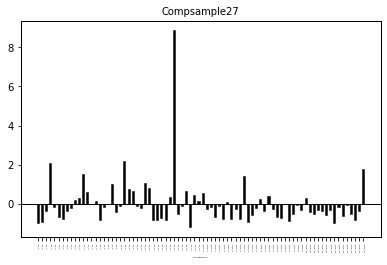

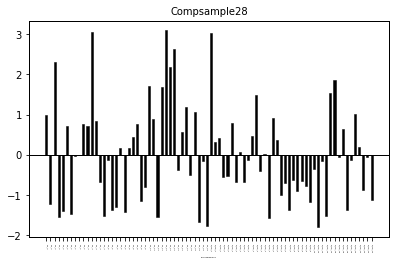

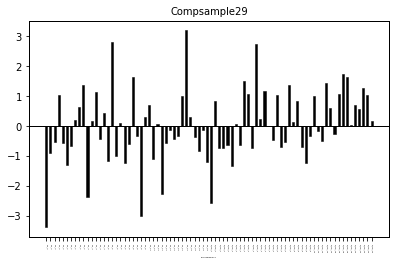

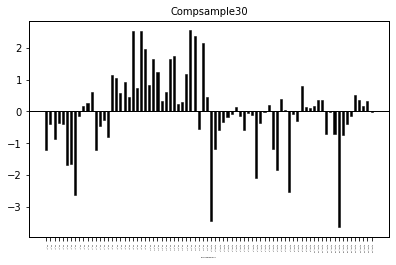

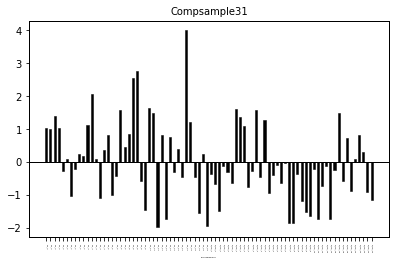

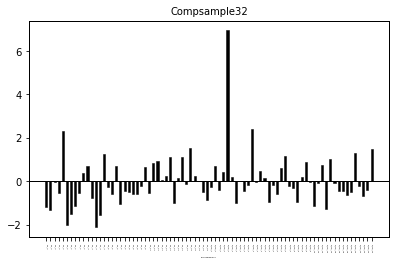

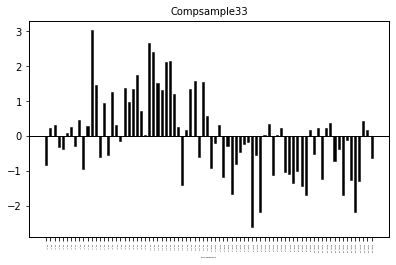

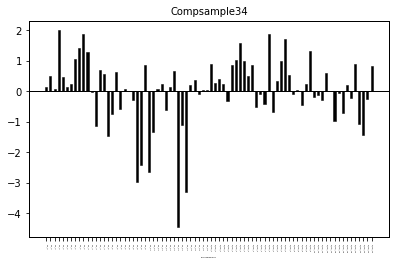

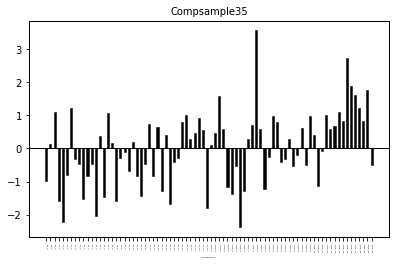

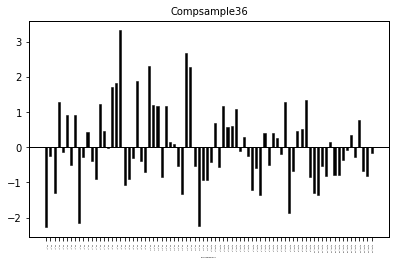

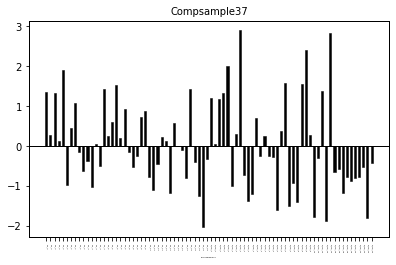

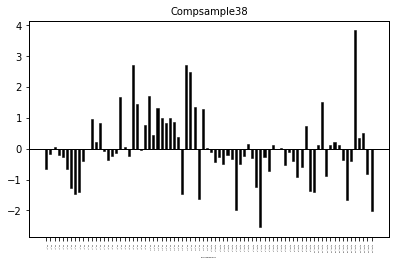

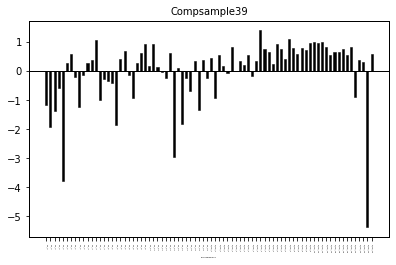

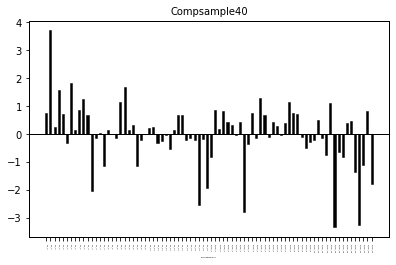

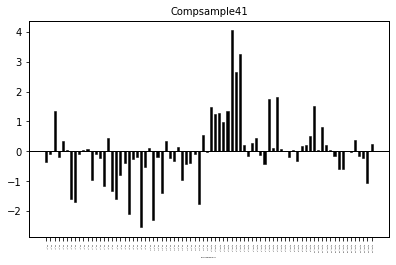

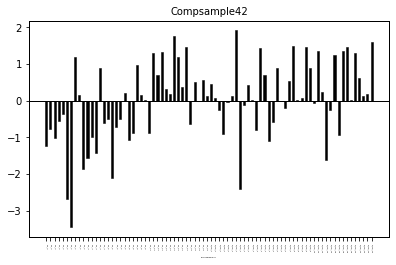

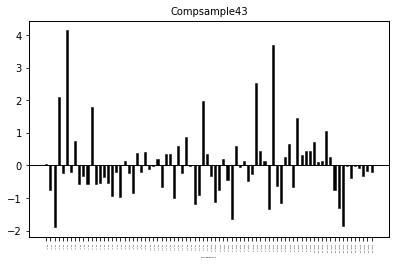

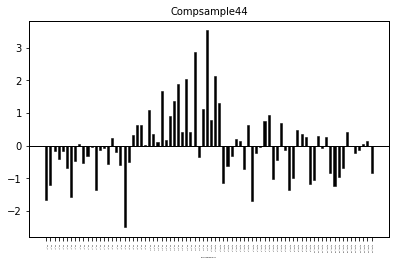

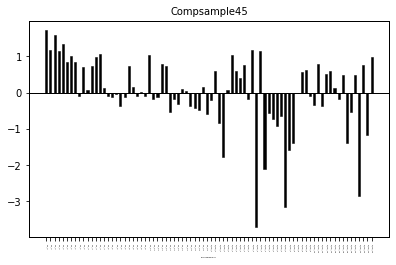

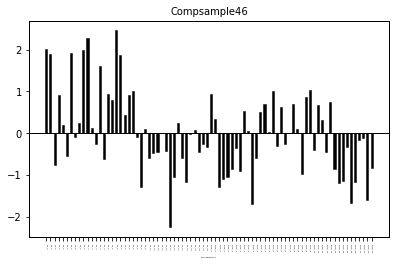

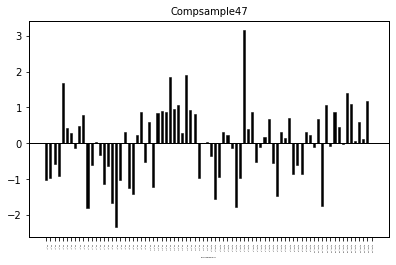

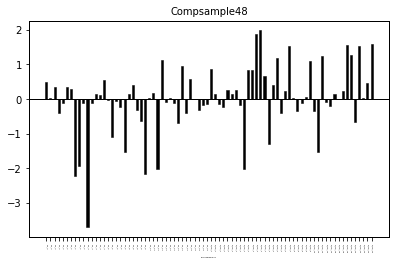

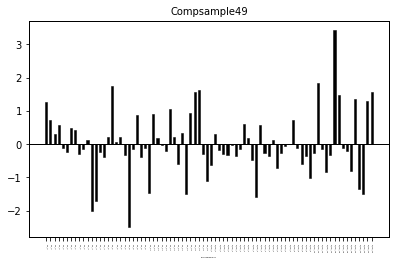

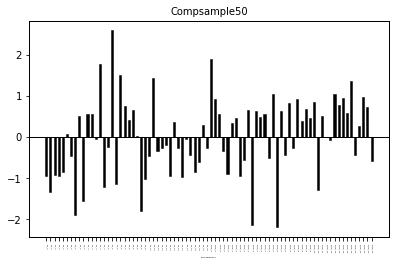

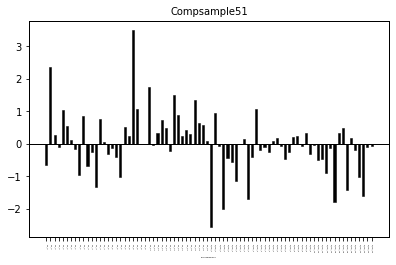

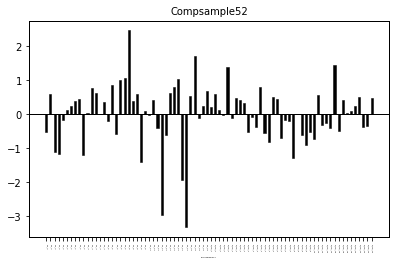

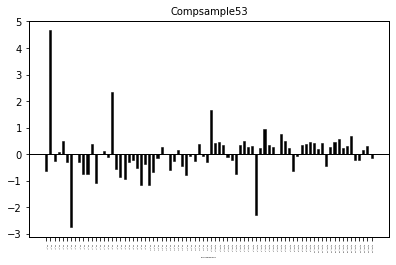

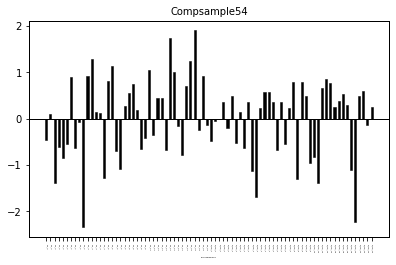

In [130]:
    AnalMetabClss.Analeachcomponents(metasamples,metasamples) 